In [3]:
from pathlib import Path
import os
import sys
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


try:
    from google.colab import files
    %tensorflow_version 2.x  # Only on colab
    os.chdir('..')
    
    if not (Path.home() / '.kaggle').is_dir():
        # Configure kaggle
        uploaded = files.upload()  # Find the kaggle.json file in your ~/.kaggle directory.
        if 'kaggle.json' in uploaded.keys():
            !mkdir -p ~/.kaggle
            !mv kaggle.json ~/.kaggle/
            !chmod 600 ~/.kaggle/kaggle.json
    
    !pip install git+https://github.com/SachsLab/indl.git
    
    if Path.cwd().stem == 'MonkeyPFCSaccadeStudies':
        os.chdir(Path.cwd().parent)

    if not (Path.cwd() / 'MonkeyPFCSaccadeStudies').is_dir():
        !git clone --single-branch --recursive https://github.com/SachsLab/MonkeyPFCSaccadeStudies.git
        sys.path.append(str(Path.cwd() / 'MonkeyPFCSaccadeStudies'))
    os.chdir('MonkeyPFCSaccadeStudies')
    
    !pip install -q kaggle
    # plt.style.use('dark_background')
    IN_COLAB = True
except ModuleNotFoundError:
    import sys
    
    # chdir to MonkeyPFCSaccadeStudies
    if Path.cwd().stem == 'Analysis':
        os.chdir(Path.cwd().parent.parent)
    
    # Add indl repository to path.
    # Eventually this should already be pip installed, but it's still under heavy development so this is easier for now.
    check_dir = Path.cwd()
    while not (check_dir / 'Tools').is_dir():
        check_dir = check_dir / '..'
    indl_path = check_dir / 'Tools' / 'Neurophys' / 'indl'
    sys.path.append(str(indl_path))
    
    # Make sure the kaggle executable is on the PATH
    os.environ['PATH'] = os.environ['PATH'] + ';' + str(Path(sys.executable).parent / 'Scripts')
    
    IN_COLAB = False

# Try to clear any logs from previous runs
if (Path.cwd() / 'logs').is_dir():
    import shutil
    try:
        shutil.rmtree(str(Path.cwd() / 'logs'))
    except PermissionError:
        print("Unable to remove logs directory.")
        
from misc.misc import sess_infos
from indl.display import turbo_cmap

plt.rcParams.update({
    'axes.titlesize': 24,
    'axes.labelsize': 20,
    'lines.linewidth': 2,
    'lines.markersize': 5,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 18
})

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Only on colab`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


Saving kaggle.json to kaggle.json
  Cloning https://github.com/SachsLab/indl.git to /tmp/pip-req-build-3p93v2cs
  Running command git clone -q https://github.com/SachsLab/indl.git /tmp/pip-req-build-3p93v2cs
  Created wheel for indl: filename=indl-0.0.1-cp36-none-any.whl size=31531 sha256=1c08ad1d1b599009bbd8ccb579fc7d7e0dbb48a5b6596deead5cca0ce30bf00b
  Stored in directory: /tmp/pip-ephem-wheel-cache-dpj24s_w/wheels/e2/63/ce/ee67f5ced8b81b3345fcd1b16fc2f708d517b1b88fa436333d
Successfully built indl
     |████████████████████████████████| 122kB 4.9MB/s 
ERROR: tensor2tensor 1.14.1 has requirement tensorflow-probability==0.7.0, but you'll have tensorflow-probability 0.9.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.21.0, but you'll have requests 2.22.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement six~=1.12.0, but you

In [0]:
shallow_cols = ['Chance', 'Targ.', 'Delay', 'Full']
shallow = np.array([[56.875,      55.,         54.375,      56.875],
                    [30.52631579, 53.68421053, 84.9122807,  97.89473684],
                    [42.80442804, 60.51660517, 72.32472325, 95.94095941],
                    [40.433213,   52.70758123, 64.98194946, 81.94945848],
                    [30.46875,    44.53125,    53.90625,    60.15625   ],
                    [46.875,      41.66666667, 59.375,      66.66666667],
                    [37.5,        35.9375,     75.,         70.3125    ],
                    [43.52941176, 57.64705882, 74.11764706, 76.47058824]])

cnn_rates = np.array([72.5, 87.71929824561404, 80.44280442804428, 80.14440433212997,
                      67.1875, 80.20833333333333, 84.375, 82.3529411764706])
rnn_rates = np.array([74.4, 88.42, 80.81, 75,
                      67.1875, 83.33, 85.93, 82.3529411764706])
                     
data = np.hstack((shallow[:, :-1], cnn_rates[:, None], rnn_rates[:, None]))
labels = [_ + '-SVM' for _ in shallow_cols[:-1]] + ['Delay-CNN', 'Delay-RNN']
sess_names = [_['exp_code'].split('_')[2] for _ in sess_infos]

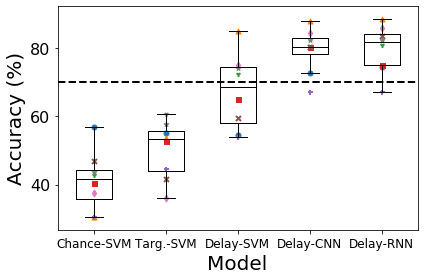

In [6]:
fig1, ax1 = plt.subplots(figsize=(6, 4))

plt.axhline(70, color='k', linestyle='--')

ax1.boxplot(data, showfliers=False, medianprops=dict(color='k'))
ax1.set_xticklabels(labels, fontsize=12)
plt.ylabel('Accuracy (%)')
# plt.ylim([0, 100])
plt.xlabel('Model')

# colormap = cm.rainbow(np.linspace(0, 1, data.shape[0]))
# for row_ix, c in zip(range(data.shape[0]), colormap):
#     plt.plot([3, 4], data[row_ix, -3:-1], label=sess_names[row_ix], color = c)
#     plt.plot([4, 5], data[row_ix, -2:], color = c)
# plt.legend(loc="lower right", fontsize='small', ncol=4)

for row_ix, m in zip(range(data.shape[0]), ['o', '^', '1', 's', '+', 'x', 'd', '*']):
    plt.scatter([1, 2, 3, 4, 5], data[row_ix, :], marker=m)

plt.tight_layout()
fig1.savefig('classif_acc.png')

In [7]:
means = np.mean(data, axis=0)
sems = np.std(data, axis=0) / np.sqrt(data.shape[0])
print([f"{means[_]:.1f} ± {sems[_]:.1f}" for _ in range(means.shape[0])])

['41.1 ± 2.9', '50.2 ± 2.8', '67.4 ± 3.7', '79.4 ± 2.2', '79.7 ± 2.3']


In [8]:
gains = data[:, -1] - data[:, -3]
print(f"{np.mean(gains):.1f} ± {np.std(gains) / np.sqrt(len(gains)):.1f}")

12.3 ± 2.2
